# Task 1

In [1]:
import pygad 
import pandas as pd
import matplotlib.pyplot as plt
import os

In [44]:
def read_graph(path):
    with open(path) as f: n = int(f.readline())
    print(n)
    graph = pd.read_csv(path, sep=" ", skiprows=1, names=["A", "B", "w"])
    print(graph)
    return n, graph

In [45]:
# choose graph
path = "../graphs/g8.txt"

n, graph = read_graph(path)

# choose start and end paramethers
start = 1
end = 15

15
     A   B  w
0    1   3  5
1    1   6  9
2    1   8  4
3    2   4  3
4    2   6  7
5    2   7  8
6    2   9  4
7    3   7  3
8    3   8  5
9    4   5  2
10   4   8  5
11   4   9  1
12   4  13  6
13   5   7  2
14   5   8  3
15   6   7  7
16   7  15  1
17   6   9  4
18   8   9  9
19   8  14  2
20   9  10  4
21   9  11  2
22  10  12  3
23  11   1  1
24  12   3  4
25  12  13  4
26  13   2  2
27  13   5  7
28  14  11  1
29  15   1  7


In [46]:

# fitness function
def pathLength(pygad_instance, path, solution_index):
    INVALID = -1e12
    path_real = []
    seen = set()

    for x in path:
        if x != 0 and x not in seen:
            path_real.append(x)
            seen.add(x)
    path_real.append(end)

    N = len(path_real)
    dist = 0
    prev = start

    for i in range(N): 
        node = path_real[i]

        w = graph.loc[(graph['A'] == prev) & (graph['B'] == node), 'w']
        if w.empty:
            return INVALID    # punish not available path
        
        dist += w.values[0]
        prev = node

    return -dist


In [41]:
def genetic_algo_task1(number_generations, number_parents_mating, solutions_per_pop):
  gene_space = [i for i in range(0, n+1) if i != start and i != end]
  print(f"gene space: {gene_space}")

  ga_instance = pygad.GA(fitness_func = pathLength,
                      num_generations=number_generations,
                      num_parents_mating=number_parents_mating,
                      sol_per_pop=solutions_per_pop,
                      num_genes=(n-2),
                      gene_space=gene_space,
                      gene_type=int,
                      mutation_type="swap",
                      mutation_probability=0.1
                    )

  ga_instance.run()

  #solution, solution_fitness, solution_idx = ga_instance.best_solution()

  print("best solution: ", ga_instance.best_solution())
  ga_instance.plot_fitness()

  return abs(ga_instance.best_solution()[1])

gene space: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
best solution:  (array([ 3,  6, 11,  3,  0, 14,  3,  6, 11,  3,  0, 14,  7]), np.float64(-1000000000000.0), np.int64(0))


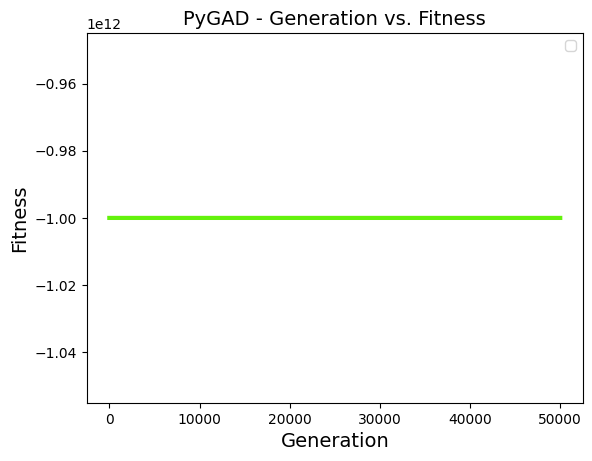

In [43]:
fitness = genetic_algo_task1(
        number_generations=50000,
        number_parents_mating=5,
        solutions_per_pop=500
    )

gene space: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
best solution:  (array([11, 11,  5, 11, 13, 13, 11, 11,  5, 11,  8,  2,  0]), np.float64(-1000000000000.0), np.int64(0))


c:\Python312\Lib\site-packages\pygad\visualize\plot.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplt.legend()


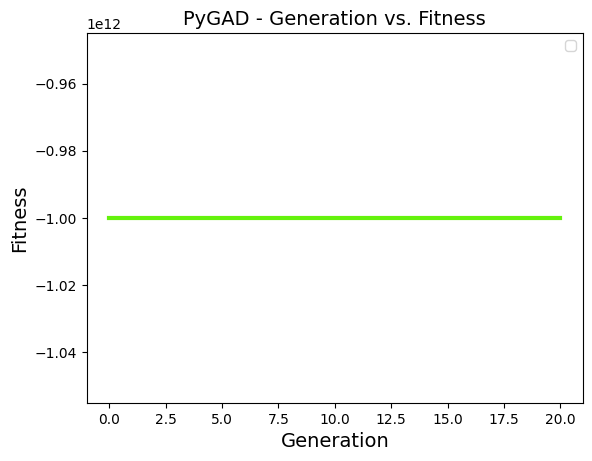

gene space: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
best solution:  (array([14, 10,  7,  8,  5, 10, 14, 10,  7,  8,  5, 14, 14]), np.float64(-1000000000000.0), np.int64(0))


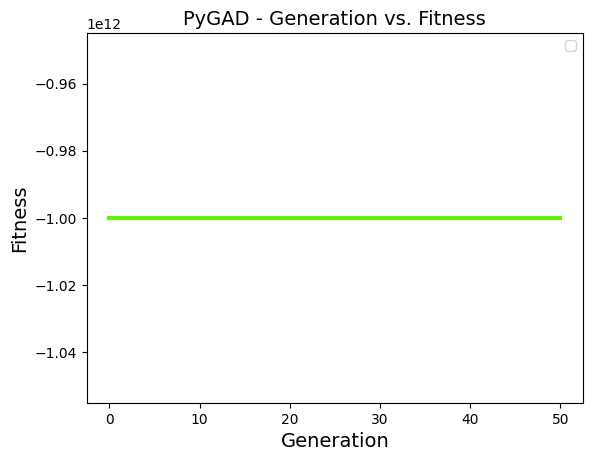

gene space: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
best solution:  (array([14, 12,  0,  9,  9, 12, 14, 12,  0,  9,  9, 12, 10]), np.float64(-1000000000000.0), np.int64(0))


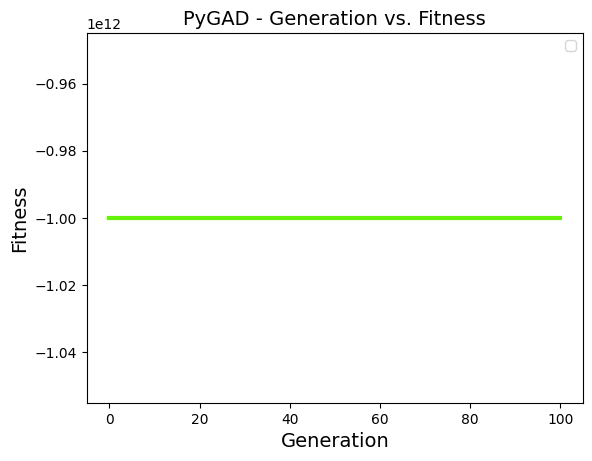

gene space: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
best solution:  (array([ 8,  5, 14,  0,  6,  7,  8,  5, 14,  0,  6,  7,  6]), np.float64(-1000000000000.0), np.int64(0))


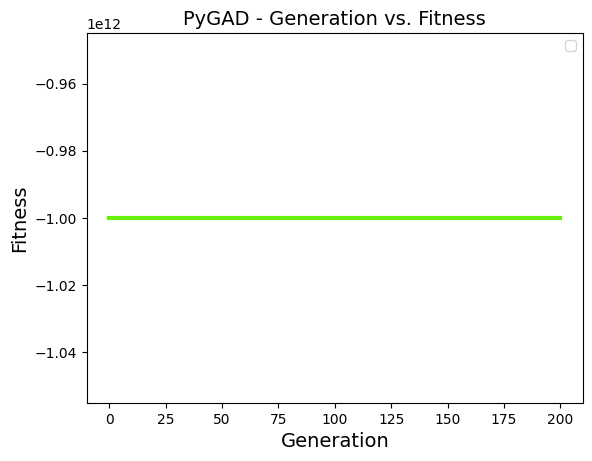

gene space: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
best solution:  (array([ 8,  3,  9, 10,  0,  6,  8,  3,  9, 10,  0,  6,  9]), np.float64(-1000000000000.0), np.int64(0))


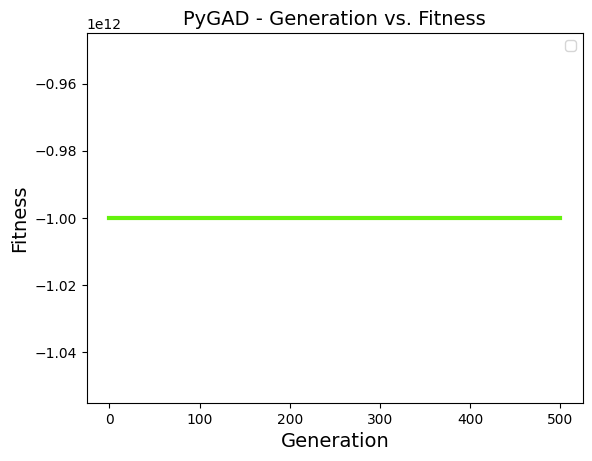

In [ ]:
# shrani rezultat v .csv dolocen v path
# stolpci so stevilo generacij
# vsaka vrstica je rezultat za en graf (ce hoces kaksno odstranit jo samo zbrises)
# -> to potem narise v report -would be nice ce bi algoritem delal :)

# run with different generation sizes
generations = [20, 50, 100, 200, 500]
csv_path = "GenerationsResults.csv"
results = {}

for g in generations:
    fitness = genetic_algo_task1(
        number_generations=g,
        number_parents_mating=5,
        solutions_per_pop=50
    )

    results[f"gen_{g}"] = fitness  #a map

# change to pandas dataframe
df_row = pd.DataFrame([results])

# Save or append
if not os.path.exists(csv_path):
    df_row.to_csv(csv_path, index=False)
else:
    df_row.to_csv(csv_path, mode="a", header=False, index=False)